In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pickle

In [45]:
import statsmodels.api as sm

In [39]:
northcarolina_districts = pd.read_csv('data/North_Carolina/northcarolina_districts.csv')

In [40]:
northcarolina_districts

,Unnamed: 0,County,EXAM_COUNT,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE,Year,lat,lng
0,0,Alamance-Burlington,993.0,440,44.3101712,2018,NaN,NaN
1,1,Alexander,171.0,87,50.877193,2018,35.9210,-81.1770
2,2,Alleghany,2.0,*,*,2018,36.4916,-81.1270
3,3,Anson,19.0,6,31.5789474,2018,34.9738,-80.1027
4,4,Ashe,97.0,53,54.6391753,2018,36.4341,-81.5004
...,...,...,...,...,...,...,...,...
474,474,Wayne,194.0,64,32.989690722,2022,35.3640,-78.0040
475,475,Wilkes,196.0,75,38.265306122,2022,36.2062,-81.1630
476,476,Wilson,224.0,135,60.267857143,2022,35.7051,-77.9187
477,477,Yadkin,72.0,45,62.5,2022,36.1605,-80.6652


In [41]:
northcarolina_districts18 = northcarolina_districts[northcarolina_districts['Year'] == 2018]
northcarolina_districts19 = northcarolina_districts[northcarolina_districts['Year'] == 2019]
northcarolina_districts20 = northcarolina_districts[northcarolina_districts['Year'] == 2020]
northcarolina_districts21 = northcarolina_districts[northcarolina_districts['Year'] == 2021]
northcarolina_districts22 = northcarolina_districts[northcarolina_districts['Year'] == 2022]

In [42]:
northcarolina_districts22

,Unnamed: 0,County,EXAM_COUNT,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE,Year,lat,lng
384,384,Alexander,111.0,89,80.18018018,2022,35.9210,-81.1770
385,385,Alleghany,NaN,NaN,NaN,2022,36.4916,-81.1270
386,386,Anson,NaN,NaN,NaN,2022,34.9738,-80.1027
387,387,Ashe,38.0,33,86.842105263,2022,36.4341,-81.5004
388,388,Avery,84.0,33,39.285714286,2022,36.0765,-81.9226
...,...,...,...,...,...,...,...,...
474,474,Wayne,194.0,64,32.989690722,2022,35.3640,-78.0040
475,475,Wilkes,196.0,75,38.265306122,2022,36.2062,-81.1630
476,476,Wilson,224.0,135,60.267857143,2022,35.7051,-77.9187
477,477,Yadkin,72.0,45,62.5,2022,36.1605,-80.6652


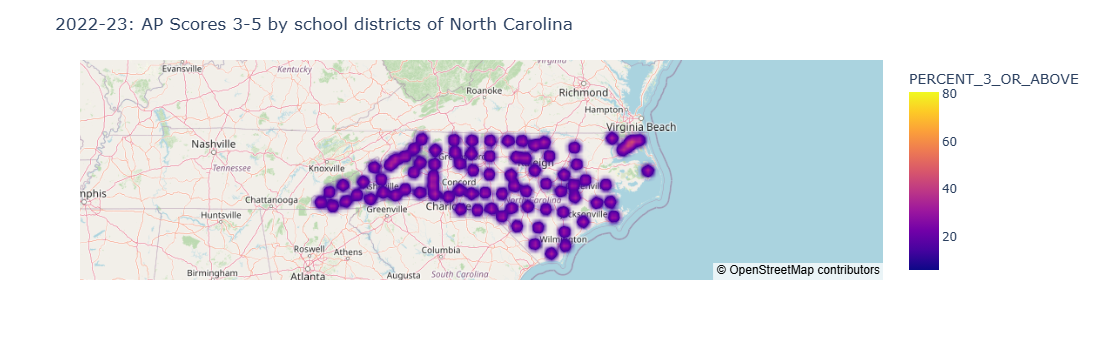

In [18]:
fig = px.density_mapbox(northcarolina_districts18, lat='lat', lon='lng', z='PERCENT_3_OR_ABOVE', radius=10,
                        center=dict(lat=35.8, lon=-80), zoom=4.8,
                        mapbox_style="open-street-map")
fig.update_layout(
    title='2022-23: AP Scores 3-5 by school districts of North Carolina'
)

fig.show()
with open('data/NC_pickled/NC_AP_pass_rate_by_school_districts.pkl', 'wb') as f:
    pickle.dump(fig, f)

In [19]:
northcarolina = pd.read_csv('data/North_Carolina/train_test_split/northcarolina_closest_five_method.csv')

In [20]:
northcarolina

,Unnamed: 0,County,EXAM_COUNT,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE,Year,lat,lng,population,per_capita_income,...,closest_five_avg_enrollment_r1r2,closest_five_avg_enrollment_public,closest_five_avg_enrollment_private_nfp,closest_five_avg_enrollment_landgrnt,closest_five_avg_enrollment_stem,closest_five_avg_dormrooms_r1r2,closest_five_avg_dormrooms_public,closest_five_avg_dormrooms_private_nfp,closest_five_avg_dormrooms_landgrant,closest_five_avg_dormrooms_stem
0,0,Alamance-Burlington,993.0,440,44.3101712,2018,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Alexander,171.0,87,50.877193,2018,35.9210,-81.1770,36459.0,37082.0,...,19252.2,4251.0,1534.0,30746.0,19252.2,4804.0,0.0,858.4,8161.0,4804.0
2,2,Alleghany,2.0,*,*,2018,36.4916,-81.1270,10928.0,37287.0,...,19979.2,7393.0,1322.6,25496.4,19979.2,5490.4,1234.2,581.6,6692.0,5490.4
3,3,Anson,19.0,6,31.5789474,2018,34.9738,-80.1027,22782.0,37416.0,...,23769.6,2861.2,1611.8,24885.2,23769.6,6024.2,0.0,814.8,6909.0,6024.2
4,4,Ashe,97.0,53,54.6391753,2018,36.4341,-81.5004,26641.0,35348.0,...,24151.4,6974.0,1299.6,23800.2,24151.4,5580.8,1234.2,504.8,6148.2,5580.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,Wayne,239.0,79,33.054393305,2020,35.3640,-78.0040,117266.0,44189.0,...,28576.2,3539.8,2403.6,20040.2,28576.2,7345.4,0.0,648.0,6174.4,7345.4
284,284,Wilkes,195.0,97,49.743589744,2020,36.2062,-81.1630,65904.0,41195.0,...,19252.2,7597.4,2683.4,25496.4,19252.2,4804.0,1234.2,1105.8,6692.0,4804.0
285,285,Wilson,255.0,136,53.333333333,2020,35.7051,-77.9187,78807.0,44619.0,...,28576.2,4253.6,1548.4,20131.4,28576.2,7345.4,0.0,596.0,6243.2,7345.4
286,286,Yadkin,99.0,42,42.424242424,2020,36.1605,-80.6652,37246.0,41757.0,...,23734.4,5115.8,2556.8,25496.4,23734.4,6118.2,598.0,1073.0,6692.0,6118.2


In [21]:
northcarolina.columns[:]

Index(['Unnamed: 0', 'County', 'EXAM_COUNT', 'EXAMS_3_OR_ABOVE',
       'PERCENT_3_OR_ABOVE', 'Year', 'lat', 'lng', 'population',
       'per_capita_income', 'closest_five_r1r2_avg', 'closest_five_public_avg',
       'closest_five_private_notprofit_avg', 'closest_five_landgrnt_avg',
       'closest_five_stem_avg', 'closest_five_avg_enrollment_r1r2',
       'closest_five_avg_enrollment_public',
       'closest_five_avg_enrollment_private_nfp',
       'closest_five_avg_enrollment_landgrnt',
       'closest_five_avg_enrollment_stem', 'closest_five_avg_dormrooms_r1r2',
       'closest_five_avg_dormrooms_public',
       'closest_five_avg_dormrooms_private_nfp',
       'closest_five_avg_dormrooms_landgrant',
       'closest_five_avg_dormrooms_stem'],
      dtype='object')

In [57]:
northcarolina=northcarolina.dropna(subset=['PERCENT_3_OR_ABOVE'])
northcarolina=northcarolina.dropna(subset=['per_capita_income'])
northcarolina=northcarolina.replace('*', 0.0)

In [76]:
# Convert columns to numeric
northcarolina['per_capita_income'] = pd.to_numeric(northcarolina['per_capita_income'])
northcarolina['PERCENT_3_OR_ABOVE'] = pd.to_numeric(northcarolina['PERCENT_3_OR_ABOVE'])

In [77]:
x_arr = northcarolina['per_capita_income'].to_numpy()
y_arr = northcarolina['PERCENT_3_OR_ABOVE'].to_numpy()

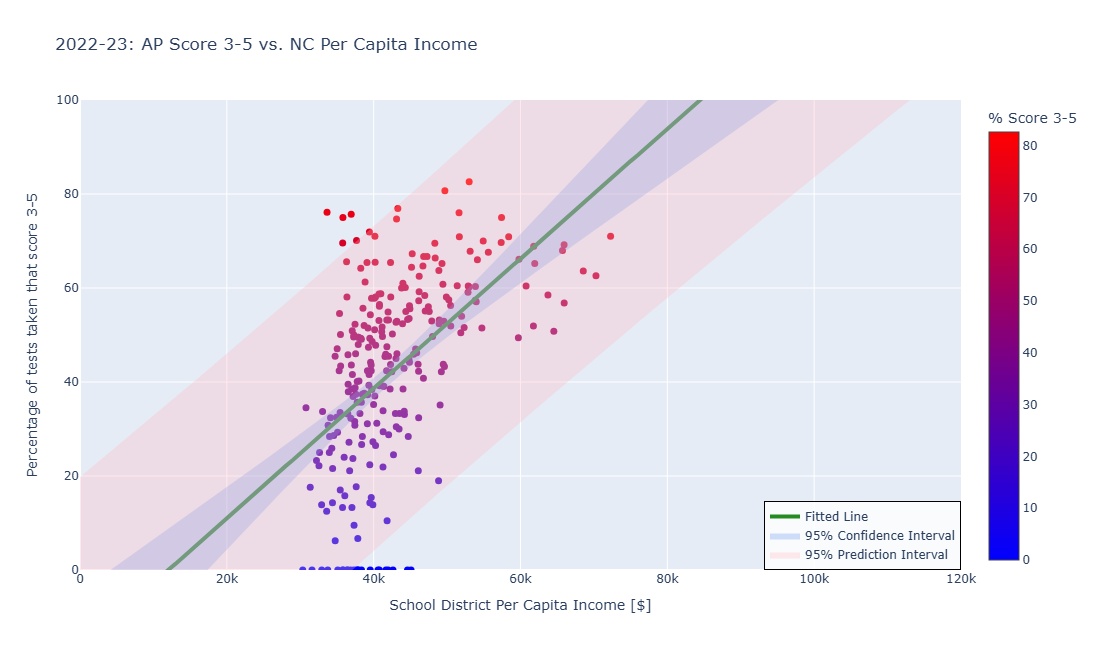

In [88]:
# Fit the OLS model
alpha = 0.05  # 95% confidence level
x_with_const = sm.add_constant(x_arr)  # Add intercept
model = sm.OLS(y_arr, x_with_const).fit()

# Generate x values for the fitted line
x_line = np.linspace(0, 260e3, 261)
x_line_rounded = np.round(x_line, decimals=-1)
x_line_with_const = sm.add_constant(x_line_rounded)

# Get predictions and intervals
predictions = model.get_prediction(x_line_with_const)
prediction_summary = predictions.summary_frame(alpha=alpha)

# Extract values
y_line = prediction_summary['mean'].values
ci_lower = prediction_summary['mean_ci_lower'].values  # Confidence Interval lower bound
ci_upper = prediction_summary['mean_ci_upper'].values  # Confidence Interval upper bound
pi_lower = prediction_summary['obs_ci_lower'].values  # Prediction Interval lower bound
pi_upper = prediction_summary['obs_ci_upper'].values  # Prediction Interval upper bound

# Round fitted values for consistency
y_line = np.round(y_line, decimals=1)

#### Draw the data points ####
fig = go.Figure(data=go.Scatter(
    x=np.round(x_arr, decimals=-1),
    y=np.round(y_arr, decimals=1),
    mode='markers',
    marker=dict(
        size=7,
        color=y_arr,
        colorscale='Bluered',
        symbol='circle',
        showscale=True,
        colorbar=dict(title='% Score 3-5'),
    ),
    showlegend=False,
    text=northcarolina['County'],
    name=''
))

#### Add the fitted line ####
fig.add_trace(go.Scatter(
    x=x_line_rounded,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen", width=4),
    name="Fitted Line",
    showlegend=True
))

#### Add the Confidence Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line_rounded, x_line_rounded[::-1]]),
    y=np.concatenate([ci_upper, ci_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(100, 149, 237, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Confidence Interval"
))

#### Add the Prediction Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line_rounded, x_line_rounded[::-1]]),
    y=np.concatenate([pi_upper, pi_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(255, 182, 193, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Prediction Interval"
))

#### Write the title of the plot ####
fig.update_layout(
    title='2022-23: AP Score 3-5 vs. NC Per Capita Income',
    xaxis_title='School District Per Capita Income [$]',
    yaxis_title='Percentage of tests taken that score 3-5',
    width=650,
    height=650,
    legend=dict(
        x=1.0,  # Position of the legend (x-coordinate in normalized units)
        y=0.0,  # Position of the legend (y-coordinate in normalized units)
        xanchor='right',  # Align the legend box to the right
        yanchor='bottom',  # Align the legend box to the bottom
        bgcolor='rgba(255, 255, 255, 0.8)',  # White background with some transparency
        bordercolor='black',
        borderwidth=1
    )
)
fig.update_xaxes(range=[0, 120e3])
fig.update_yaxes(range=[0, 100])
fig.show()

# Save the plot
with open('data/NC_pickled/NC_pass_vs_school_district_income.pkl', 'wb') as f:
    pickle.dump(fig, f)

### Feature 2: 2022-23: AP Score 3-5 vs. District Population

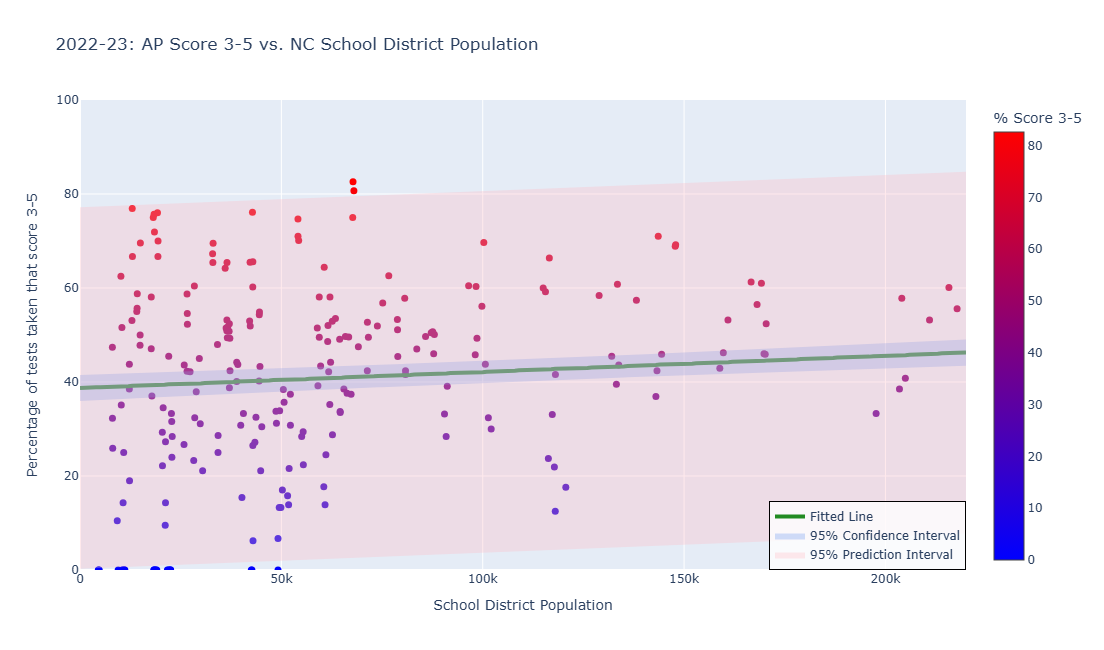

In [93]:
x_arr = northcarolina['population'].to_numpy()
y_arr = northcarolina['PERCENT_3_OR_ABOVE'].to_numpy()

# Fit the OLS model
alpha = 0.05  # 95% confidence level
x_with_const = sm.add_constant(x_arr)  # Add intercept
model = sm.OLS(y_arr, x_with_const).fit()

# Generate x values for the fitted line
x_line = np.linspace(0, 220e3, 221)
x_line = np.round(x_line, decimals=-1)
x_line_with_const = sm.add_constant(x_line)

# Get predictions and intervals
predictions = model.get_prediction(x_line_with_const)
prediction_summary = predictions.summary_frame(alpha=alpha)

# Extract values
y_line = prediction_summary['mean'].values
ci_lower = prediction_summary['mean_ci_lower'].values  # Confidence Interval lower bound
ci_upper = prediction_summary['mean_ci_upper'].values  # Confidence Interval upper bound
pi_lower = prediction_summary['obs_ci_lower'].values  # Prediction Interval lower bound
pi_upper = prediction_summary['obs_ci_upper'].values  # Prediction Interval upper bound

# Round fitted values for consistency
y_line = np.round(y_line, decimals=1)

#### Draw the data points ####
fig = go.Figure(data=go.Scatter(
    x=np.round(x_arr, decimals=-1),
    y=np.round(y_arr, decimals=1),
    mode='markers',
    marker=dict(
        size=7,
        color=y_arr,
        colorscale='Bluered',
        symbol='circle',
        showscale=True,
        colorbar=dict(title='% Score 3-5'),
    ),
    showlegend=False,
    text=northcarolina['County'],
    name=''
))

#### Add the fitted line ####
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen", width=4),  # Thicker fitted line
    name="Fitted Line",
    showlegend=True
))

#### Add the Confidence Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([ci_upper, ci_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(100, 149, 237, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Confidence Interval"
))

#### Add the Prediction Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([pi_upper, pi_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(255, 182, 193, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Prediction Interval"
))

#### Write the title of the plot ####
fig.update_layout(
    title='2022-23: AP Score 3-5 vs. NC School District Population',
    xaxis_title='School District Population',
    yaxis_title='Percentage of tests taken that score 3-5',
    width=650,
    height=650,
    legend=dict(
        x=1.0,  # Position of the legend (x-coordinate in normalized units)
        y=0.0,  # Position of the legend (y-coordinate in normalized units)
        xanchor='right',  # Align the legend box to the right
        yanchor='bottom',  # Align the legend box to the bottom
        bgcolor='rgba(255, 255, 255, 0.8)',  # White background with some transparency
        bordercolor='black',
        borderwidth=1
    )
)

fig.update_xaxes(range=[0, 220e3])
fig.update_yaxes(range=[0, 100])
fig.show()

# Save the plot
with open('data/NC_pickled/NC_pass_vs_school_district_population.pkl', 'wb') as f:
    pickle.dump(fig, f)


### Feature 3: Average distance to 5 closest public universities

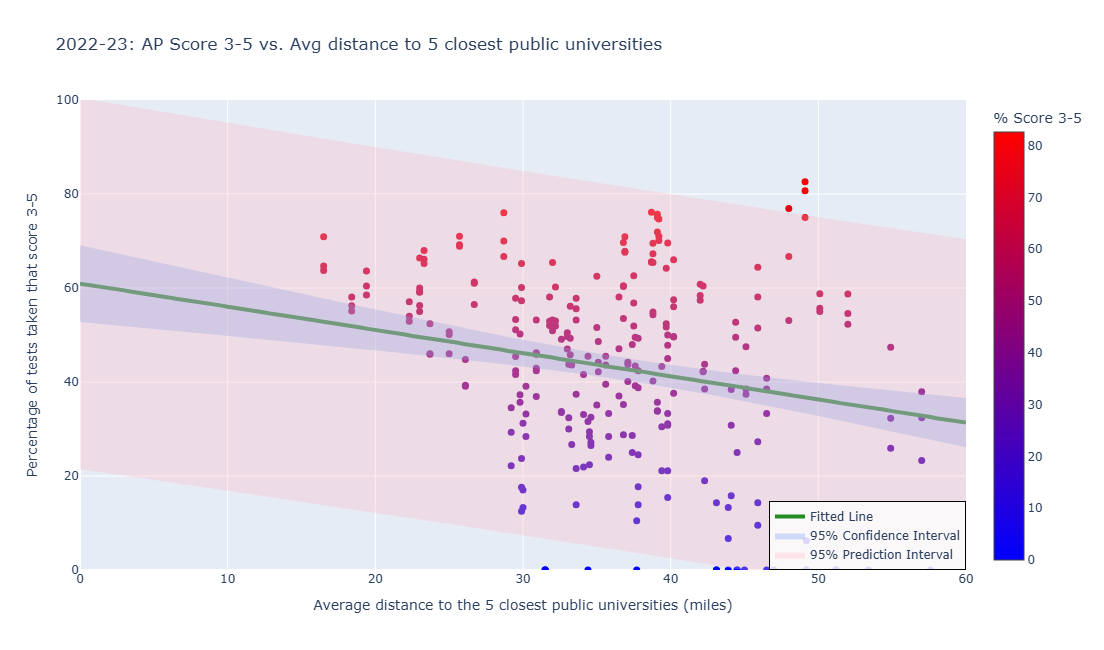

In [94]:
x_arr = northcarolina['closest_five_public_avg'].to_numpy()
y_arr = northcarolina['PERCENT_3_OR_ABOVE'].to_numpy()

# Fit the OLS model
alpha = 0.05  # 95% confidence level
x_with_const = sm.add_constant(x_arr)  # Add intercept
model = sm.OLS(y_arr, x_with_const).fit()

# Generate x values for the fitted line
x_line = np.linspace(0, 60, 121)
x_line = np.round(x_line, decimals = 1)
x_line_with_const = sm.add_constant(x_line)

# Get predictions and intervals
predictions = model.get_prediction(x_line_with_const)
prediction_summary = predictions.summary_frame(alpha=alpha)

# Extract values
y_line = prediction_summary['mean'].values
ci_lower = prediction_summary['mean_ci_lower'].values  # Confidence Interval lower bound
ci_upper = prediction_summary['mean_ci_upper'].values  # Confidence Interval upper bound
pi_lower = prediction_summary['obs_ci_lower'].values  # Prediction Interval lower bound
pi_upper = prediction_summary['obs_ci_upper'].values  # Prediction Interval upper bound

# Round fitted values for consistency
y_line = np.round(y_line, decimals=1)

#### Draw the data points ####
fig = go.Figure(data=go.Scatter(
    x=np.round(x_arr, decimals=1),
    y=np.round(y_arr, decimals=1),
    mode='markers',
    marker=dict(
        size=7,
        color=y_arr,
        colorscale='Bluered',
        symbol='circle',
        showscale=True,
        colorbar=dict(title='% Score 3-5'),
    ),
    showlegend=False,
    text=northcarolina['County'],
    name=''
))

#### Add the fitted line ####
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen", width=4),  # Thicker fitted line
    name="Fitted Line",
    showlegend=True
))

#### Add the Confidence Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([ci_upper, ci_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(100, 149, 237, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Confidence Interval"
))

#### Add the Prediction Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([pi_upper, pi_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(255, 182, 193, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Prediction Interval"
))

#### Write the title of the plot ####
fig.update_layout(
    title='2022-23: AP Score 3-5 vs. Avg distance to 5 closest public universities',
    xaxis_title='Average distance to the 5 closest public universities (miles)',
    yaxis_title='Percentage of tests taken that score 3-5',
    width=650,
    height=650,
    legend=dict(
        x=1.0,  # Position of the legend (x-coordinate in normalized units)
        y=0.0,  # Position of the legend (y-coordinate in normalized units)
        xanchor='right',  # Align the legend box to the right
        yanchor='bottom',  # Align the legend box to the bottom
        bgcolor='rgba(255, 255, 255, 0.8)',  # White background with some transparency
        bordercolor='black',
        borderwidth=1
    )
)

fig.update_xaxes(range=[0, 60])
fig.update_yaxes(range=[0, 100])
fig.show()

### Feature 4: 2022-23: AP Score 3-5 vs. avg distance to 5 closest private university

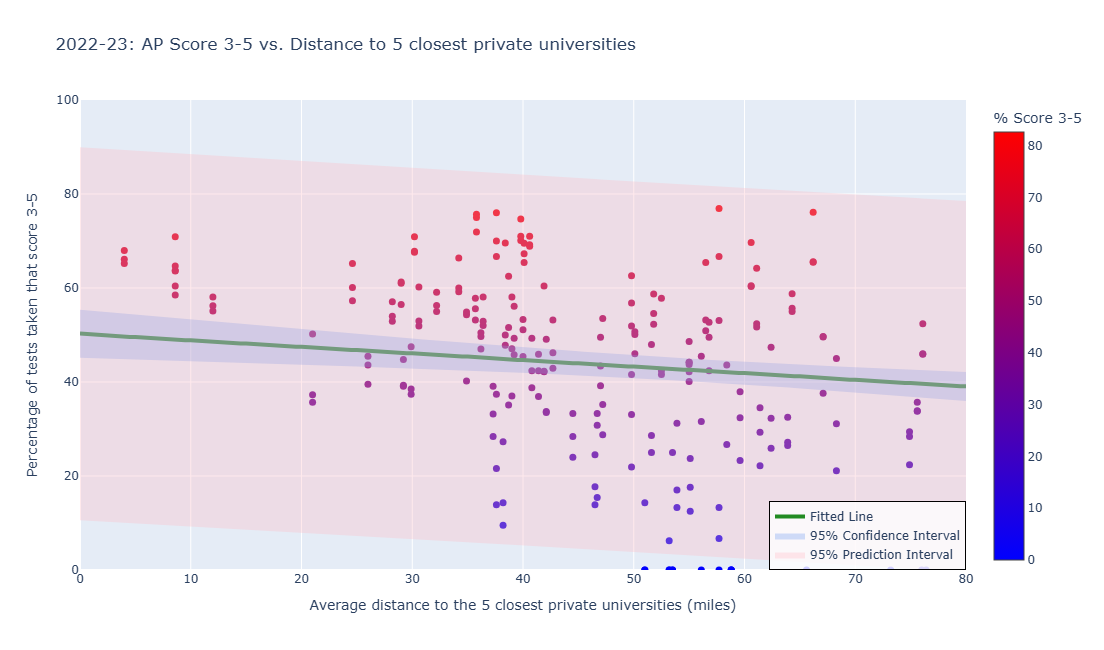

In [96]:
x_arr = northcarolina['closest_five_private_notprofit_avg'].to_numpy()
y_arr = northcarolina['PERCENT_3_OR_ABOVE'].to_numpy()

# Fit the OLS model
alpha = 0.05  # 95% confidence level
x_with_const = sm.add_constant(x_arr)  # Add intercept
model = sm.OLS(y_arr, x_with_const).fit()

# Generate x values for the fitted line
x_line = np.linspace(0, 80, 161)
x_line = np.round(x_line, decimals = 1)
x_line_with_const = sm.add_constant(x_line)

# Get predictions and intervals
predictions = model.get_prediction(x_line_with_const)
prediction_summary = predictions.summary_frame(alpha=alpha)

# Extract values
y_line = prediction_summary['mean'].values
ci_lower = prediction_summary['mean_ci_lower'].values  # Confidence Interval lower bound
ci_upper = prediction_summary['mean_ci_upper'].values  # Confidence Interval upper bound
pi_lower = prediction_summary['obs_ci_lower'].values  # Prediction Interval lower bound
pi_upper = prediction_summary['obs_ci_upper'].values  # Prediction Interval upper bound

# Round fitted values for consistency
y_line = np.round(y_line, decimals=1)

#### Draw the data points ####
fig = go.Figure(data=go.Scatter(
    x=np.round(x_arr, decimals=1),
    y=np.round(y_arr, decimals=1),
    mode='markers',
    marker=dict(
        size=7,
        color=y_arr,
        colorscale='Bluered',
        symbol='circle',
        showscale=True,
        colorbar=dict(title='% Score 3-5'),
    ),
    showlegend=False,
    text=northcarolina['County'],
    name=''
))

#### Add the fitted line ####
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen", width=4),  # Thicker fitted line
    name="Fitted Line",
    showlegend=True
))

#### Add the Confidence Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([ci_upper, ci_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(100, 149, 237, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Confidence Interval"
))

#### Add the Prediction Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([pi_upper, pi_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(255, 182, 193, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Prediction Interval"
))

#### Write the title of the plot ####
fig.update_layout(
    title='2022-23: AP Score 3-5 vs. Distance to 5 closest private universities',
    xaxis_title='Average distance to the 5 closest private universities (miles)',
    yaxis_title='Percentage of tests taken that score 3-5',
    width=650,
    height=650,
    legend=dict(
        x=1.0,  # Position of the legend (x-coordinate in normalized units)
        y=0.0,  # Position of the legend (y-coordinate in normalized units)
        xanchor='right',  # Align the legend box to the right
        yanchor='bottom',  # Align the legend box to the bottom
        bgcolor='rgba(255, 255, 255, 0.8)',  # White background with some transparency
        bordercolor='black',
        borderwidth=1
    )
)

fig.update_xaxes(range=[0, 80])
fig.update_yaxes(range=[0, 100])
fig.show()

# Save the plot
with open('data/NC_pickled/NC_pass_vs_closest_five_private_nfp_avg.pkl', 'wb') as f:
    pickle.dump(fig, f)


### Feature 5: Average enrollment in the five closest land grant universities

In [ ]:
x_arr = MA_AP_all_data['closest_five_avg_enrollment_landgrnt'].to_numpy()
y_arr = MA_AP_all_data['PERCENT_3_OR_ABOVE'].to_numpy()

# Fit the OLS model
alpha = 0.05  # 95% confidence level
x_with_const = sm.add_constant(x_arr)  # Add intercept
model = sm.OLS(y_arr, x_with_const).fit()

# Generate x values for the fitted line
x_line = np.linspace(20e3, 24e3, 41)
x_line = np.round(x_line, decimals = 1)
x_line_with_const = sm.add_constant(x_line)

# Get predictions and intervals
predictions = model.get_prediction(x_line_with_const)
prediction_summary = predictions.summary_frame(alpha=alpha)

# Extract values
y_line = prediction_summary['mean'].values
ci_lower = prediction_summary['mean_ci_lower'].values  # Confidence Interval lower bound
ci_upper = prediction_summary['mean_ci_upper'].values  # Confidence Interval upper bound
pi_lower = prediction_summary['obs_ci_lower'].values  # Prediction Interval lower bound
pi_upper = prediction_summary['obs_ci_upper'].values  # Prediction Interval upper bound

# Round fitted values for consistency
y_line = np.round(y_line, decimals = 1)

#### Draw the data points ####
fig = go.Figure(data=go.Scatter(
    x=np.round(x_arr, decimals = 2),
    y=np.round(y_arr, decimals = 1),
    mode='markers',
    marker=dict(
        size=7,
        color=y_arr,
        colorscale='Bluered',
        symbol='circle',
        showscale=True,
        colorbar=dict(title='% Score 3-5'),
    ),
    showlegend=False,
    text=MA_AP_all_data['COUNTY'],
    name=''
))

#### Add the fitted line ####
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen", width=4),  # Thicker fitted line
    name="Fitted Line",
    showlegend=True
))

#### Add the Confidence Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([ci_upper, ci_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(100, 149, 237, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Confidence Interval"
))

#### Add the Prediction Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([pi_upper, pi_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(255, 182, 193, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Prediction Interval"
))

#### Write the title of the plot ####
fig.update_layout(
    title='2022-23: AP Score 3-5 vs. Avg enrollment in 5 closest land grant uni',
    xaxis_title='Average enrollment in the 5 closest land grant universities',
    yaxis_title='Percentage of tests taken that score 3-5',
    width=650,
    height=650,
    legend=dict(
        x=1.0,  # Position of the legend (x-coordinate in normalized units)
        y=0.0,  # Position of the legend (y-coordinate in normalized units)
        xanchor='right',  # Align the legend box to the right
        yanchor='bottom',  # Align the legend box to the bottom
        bgcolor='rgba(255, 255, 255, 0.8)',  # White background with some transparency
        bordercolor='black',
        borderwidth=1
    )
)

fig.update_xaxes(range=[20e3, 24e3])
fig.update_yaxes(range=[0, 100])
fig.show()


In [70]:
# Example data
x_arr = [[1, 2], [3, 4], [5, 6]]
y_arr = [1, 2, 3]

# Convert to NumPy arrays
x_arr = np.array(x_arr)
y_arr = np.array(y_arr)

# Add constant (intercept)
x_with_const = sm.add_constant(x_arr)

# Fit the OLS model
model = sm.OLS(y_arr, x_with_const).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.634e+29
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           8.48e-16
Time:                        16:18:41   Log-Likelihood:                 99.107
No. Observations:                   3   AIC:                            -194.2
Df Residuals:                       1   BIC:                            -196.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1667   1.72e-15   9.72e+13      0.0

C:\Users\amahapatra\.conda\envs\am-env\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 3 samples were given.



In [71]:
type(x_arr)

numpy.ndarray

In [72]:
x_with_const

array([[1., 1., 2.],
       [1., 3., 4.],
       [1., 5., 6.]])

In [73]:
x_arr

array([[1, 2],
       [3, 4],
       [5, 6]])

In [22]:
northcarolina20=northcarolina[northcarolina['Year']==2020]

In [23]:
northcarolina20

,Unnamed: 0,County,EXAM_COUNT,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE,Year,lat,lng,population,per_capita_income,...,closest_five_avg_enrollment_r1r2,closest_five_avg_enrollment_public,closest_five_avg_enrollment_private_nfp,closest_five_avg_enrollment_landgrnt,closest_five_avg_enrollment_stem,closest_five_avg_dormrooms_r1r2,closest_five_avg_dormrooms_public,closest_five_avg_dormrooms_private_nfp,closest_five_avg_dormrooms_landgrant,closest_five_avg_dormrooms_stem
192,192,Alamance-Burlington,927.0,560,60.409924488,2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,193,Alexander,141.0,75,53.191489362,2020,35.9210,-81.1770,36482.0,42020.0,...,19252.2,4251.0,1534.0,30746.0,19252.2,4804.0,0.0,858.4,8161.0,4804.0
194,194,Alleghany,NaN,NaN,NaN,2020,36.4916,-81.1270,10897.0,41553.0,...,19979.2,7393.0,1322.6,25496.4,19979.2,5490.4,1234.2,581.6,6692.0,5490.4
195,195,Anson,22.0,10,45.454545455,2020,34.9738,-80.1027,22033.0,42032.0,...,23769.6,2861.2,1611.8,24885.2,23769.6,6024.2,0.0,814.8,6909.0,6024.2
196,196,Ashe,92.0,54,58.695652174,2020,36.4341,-81.5004,26580.0,40730.0,...,24151.4,6974.0,1299.6,23800.2,24151.4,5580.8,1234.2,504.8,6148.2,5580.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,Wayne,239.0,79,33.054393305,2020,35.3640,-78.0040,117266.0,44189.0,...,28576.2,3539.8,2403.6,20040.2,28576.2,7345.4,0.0,648.0,6174.4,7345.4
284,284,Wilkes,195.0,97,49.743589744,2020,36.2062,-81.1630,65904.0,41195.0,...,19252.2,7597.4,2683.4,25496.4,19252.2,4804.0,1234.2,1105.8,6692.0,4804.0
285,285,Wilson,255.0,136,53.333333333,2020,35.7051,-77.9187,78807.0,44619.0,...,28576.2,4253.6,1548.4,20131.4,28576.2,7345.4,0.0,596.0,6243.2,7345.4
286,286,Yadkin,99.0,42,42.424242424,2020,36.1605,-80.6652,37246.0,41757.0,...,23734.4,5115.8,2556.8,25496.4,23734.4,6118.2,598.0,1073.0,6692.0,6118.2


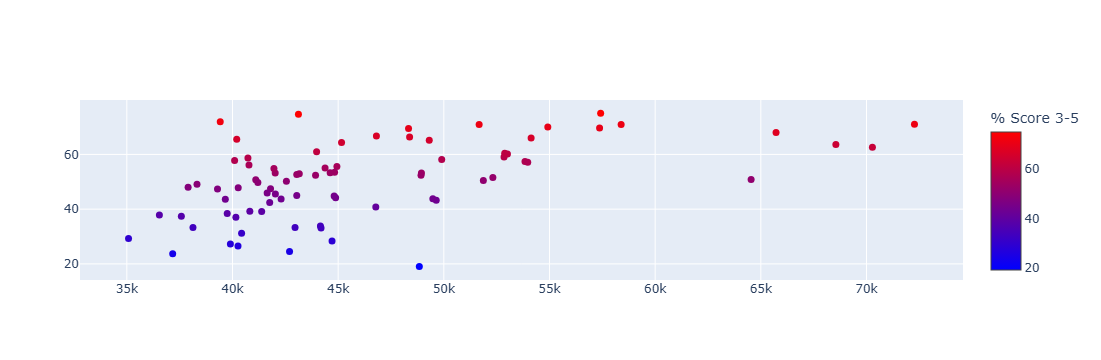

In [24]:
# Ensure no missing values and correct numeric types
northcarolina20 = northcarolina20.dropna(subset=['PERCENT_3_OR_ABOVE'])
northcarolina20 = northcarolina20.dropna(subset=['per_capita_income'])
northcarolina20['PERCENT_3_OR_ABOVE'] = pd.to_numeric(northcarolina20['PERCENT_3_OR_ABOVE'], errors='coerce')

# Create the scatter plot
fig = go.Figure(data=go.Scatter(
    x=np.round(northcarolina20['per_capita_income'], decimals=-1),
    y=np.round(northcarolina20['PERCENT_3_OR_ABOVE'], decimals=1),
    mode='markers',
    marker=dict(
        size=7,
        color=northcarolina20['PERCENT_3_OR_ABOVE'],  # Use numeric values for color
        colorscale='Bluered',  # Define the color scale
        symbol='circle',
        showscale=True,
        colorbar=dict(title='% Score 3-5'),
    ),
    showlegend=False,
    text=northcarolina20['County'],
    name=''
))

# Display the plot
fig.show()

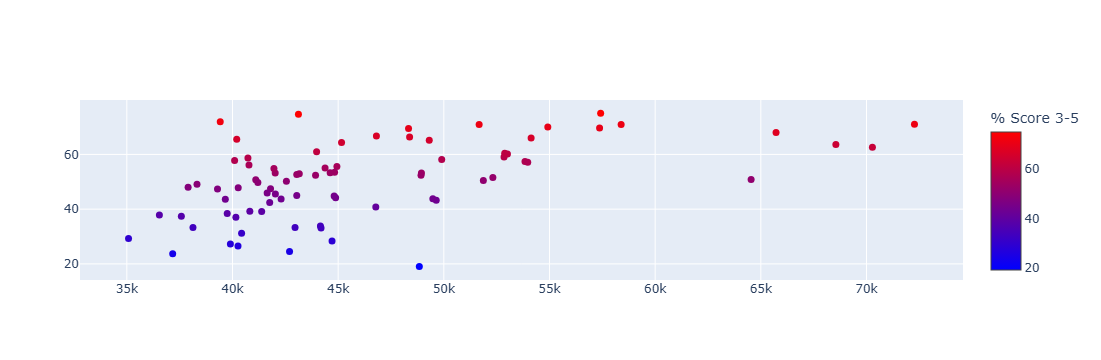

In [25]:
fig = go.Figure(data=go.Scatter(
    x=np.round(northcarolina20['per_capita_income'], decimals=-1),
    y=np.round(northcarolina20['PERCENT_3_OR_ABOVE'], decimals=1),
    mode='markers',
    marker=dict(
        size=7,
        color=northcarolina20['PERCENT_3_OR_ABOVE'],
        colorscale='Bluered',
        symbol='circle',
        showscale=True,
        colorbar=dict(title='% Score 3-5'),
    ),
    showlegend=False,
    text=northcarolina20['County'],
    name=''))
fig.show()

In [26]:
# Replace '*' with zero in the entire DataFrame
northcarolina20 = northcarolina20.replace('*', 0)
# Replace NaN values with zero
northcarolina20 = northcarolina20.fillna(0)

In [27]:

fig = px.scatter(data_frame=northcarolina20,x='per_capita_income', y='PERCENT_3_OR_ABOVE',trendline='lowess',trendline_color_override='darkblue',width=800, height=600,color='PERCENT_3_OR_ABOVE',
                 title='Pass rate vs Per Capita Income 2022-23')
fig.show()
with open('data/NC_pickled/NC_AP_pass_rate_by_counties_vs_income.pkl', 'wb') as f:
    pickle.dump(fig, f)

In [28]:
fig = px.scatter(data_frame=northcarolina20,x='population', y='PERCENT_3_OR_ABOVE',trendline='ols',trendline_color_override='darkblue',width=800, height=600,color='PERCENT_3_OR_ABOVE',title='Pass rate vs Population')
fig.show()
with open('data/NC_pickled/NC_AP_pass_rate_by_counties_vs_population.pkl', 'wb') as f:
    pickle.dump(fig, f)

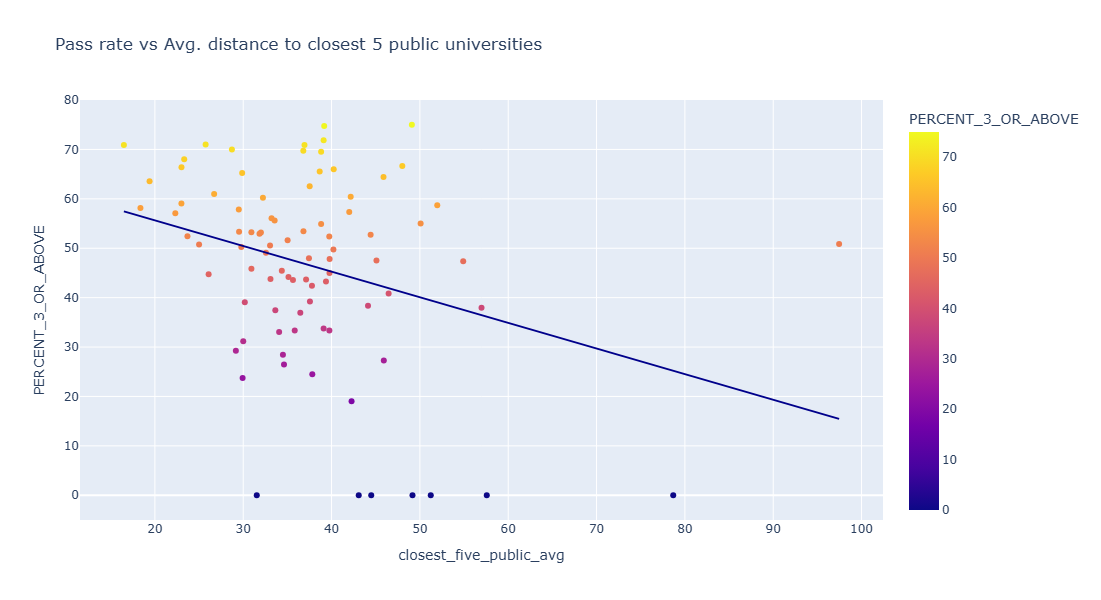

In [29]:
fig = px.scatter(data_frame=northcarolina20,x='closest_five_public_avg', y='PERCENT_3_OR_ABOVE',trendline='ols',trendline_color_override='darkblue',width=800, height=600,
                 color='PERCENT_3_OR_ABOVE',title='Pass rate vs Avg. distance to closest 5 public universities')
fig.show()
with open('data/NC_pickled/NC_AP_pass_rate_by_counties_vs_avg._dist_public.pkl', 'wb') as f:
    pickle.dump(fig, f)

In [70]:

fig = px.scatter(data_frame=northcarolina20,x='closest_five_private_nfp_avg', y='PERCENT_3_OR_ABOVE',trendline='ols',trendline_color_override='darkblue',width=800, height=600,
                 color='PERCENT_3_OR_ABOVE',title='Pass rate vs Avg. distance to closest five private universities')
fig.show()
with open('data/NC_pickled/NC_AP_pass_rate_by_counties_vs_avg_five_private.pkl', 'wb') as f:
    pickle.dump(fig, f)

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'County', 'EXAM_COUNT', 'EXAMS_3_OR_ABOVE', 'PERCENT_3_OR_ABOVE', 'Year', 'lat', 'lng', 'population', 'per_capita_income', 'closest_five_r1r2_avg', 'closest_five_public_avg', 'closest_five_private_notprofit_avg', 'closest_five_landgrnt_avg', 'closest_five_stem_avg', 'closest_five_avg_enrollment_r1r2', 'closest_five_avg_enrollment_public', 'closest_five_avg_enrollment_private_nfp', 'closest_five_avg_enrollment_landgrnt', 'closest_five_avg_enrollment_stem', 'closest_five_avg_dormrooms_r1r2', 'closest_five_avg_dormrooms_public', 'closest_five_avg_dormrooms_private_nfp', 'closest_five_avg_dormrooms_landgrant', 'closest_five_avg_dormrooms_stem'] but received: closest_five_private_nfp_avg